# Connected components

This notebook illustrates how to compute connected components of a graph using its Laplacian. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy

Below we create a networkx graph by specifying its adjacency matrix:

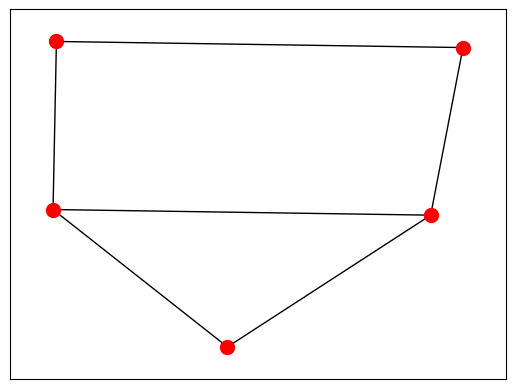

In [2]:
A = np.array([[0, 1, 1, 0, 0],
              [1, 0, 1, 1, 0],
              [1, 1, 0, 0, 1],
              [0, 1, 0, 0, 1],
              [0, 0, 1, 1, 0]
             ])

G = nx.from_numpy_array(A)
nx.draw_networkx(G, 
                 node_color="r",
                 with_labels=False, 
                 node_size=100)

Next, we calculate its Laplacian:

In [3]:
L = nx.laplacian_matrix(G).todense()
print(L)

[[ 2 -1 -1  0  0]
 [-1  3 -1 -1  0]
 [-1 -1  3  0 -1]
 [ 0 -1  0  2 -1]
 [ 0  0 -1 -1  2]]


Information about connected components of the graph can be obtained by looking at the basis of the eigenspace of the eigenvalue $\lambda = 0$ of the Laplacian. This eigenspace is the same as the null space of the Laplacian.

In [4]:
with np.printoptions(precision=3, suppress=True):
    print(scipy.linalg.null_space(L))

[[-0.447]
 [-0.447]
 [-0.447]
 [-0.447]
 [-0.447]]


In this case, the basis consists of a single vector, which means that the graph is connected. 

Here is another example:

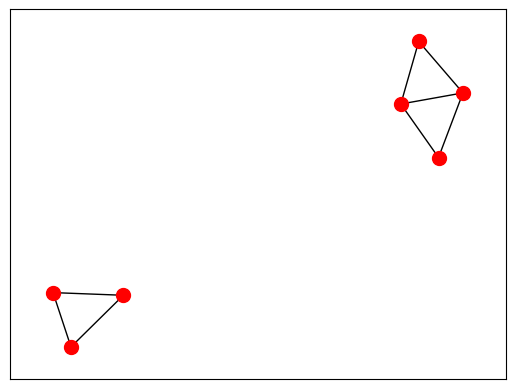

In [17]:
A = np.array([[0, 1, 1, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 1, 1, 0, 1],
              [0, 0, 0, 1, 0, 1, 0],
             ])

G = nx.from_numpy_array(A)
nx.draw_networkx(G, 
                 node_color="r",
                 with_labels=False, 
                 node_size=100)

In this case, the null space contains two linearly independent eigenvectors, since the graph has two connected components:

In [18]:
L = nx.laplacian_matrix(G).todense()
with np.printoptions(precision=3, suppress=True):
    print(scipy.linalg.null_space(L))

[[ 0.    -0.577]
 [ 0.    -0.577]
 [ 0.    -0.577]
 [ 0.5    0.   ]
 [ 0.5    0.   ]
 [ 0.5    0.   ]
 [ 0.5    0.   ]]


## Random graphs

The function below generates a random graph with `n` vertices and `m` edges, and computes a basis of the null space of the Laplacian:

In [89]:
def random_graph_components(n, m):
    G = nx.gnm_random_graph(n, m)

    nx.draw_networkx(G, 
                     node_color="r",
                     with_labels=False, 
                     node_size=20)
    plt.show()

    L = nx.laplacian_matrix(G).todense()
    
    # this replaces -0.0 values with 0.0 in the printout
    null_space[null_space == 0] = np.nan
    null_space[np.isnan(null_space)] = 0
    
    print(f"dim Nul(L) = {null_space.shape[1]}\n")
    
    print(f"basis of Nul(L):\n")

    with np.printoptions(precision=2, suppress=True, linewidth=200):
        print(null_space) 
        
    print("\n\nAdjacency matrix:\n")
    with np.printoptions(linewidth=200):
        print(nx.adjacency_matrix(G).todense())
    

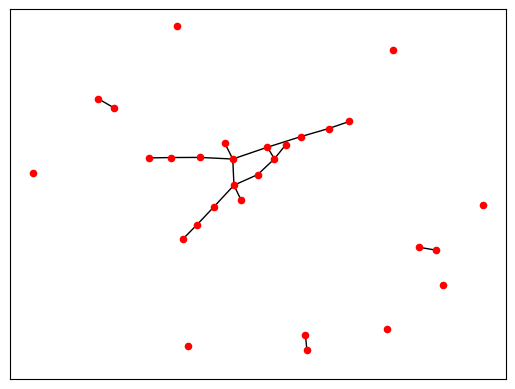

dim Nul(L) = 10

basis of Nul(L):

[[-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [ 0.1  -0.45  0.07  0.31  0.08  0.11 -0.06  0.    0.    0.  ]
 [ 0.1  -0.03  0.81  0.   -0.35 -0.44  0.1   0.    0.    0.  ]
 [ 0.16  0.62  0.21  0.67  0.14  0.25 -0.05  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [ 0.37  0.   -0.4   0.21 -0.79  0.01  0.17  0.    0.    0.  ]
 [-0.04 -0.05  0.17 -0.12  0.05  0.47  0.85  0.    0.    0.  ]
 [-0.07  0.   -0.29  0.34  0.3  -0.69  0.48  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [ 0.1  -0.45  0.07  0.31  0.08  0.11 -0.06  0.    0.    0.  ]
 [-0.3  -0.01  0.    0.1  -0.11  0.02 -0.01  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.94 -0.04 -0.33]
 [ 0.    0.    0.   

In [91]:
random_graph_components(30, 20)